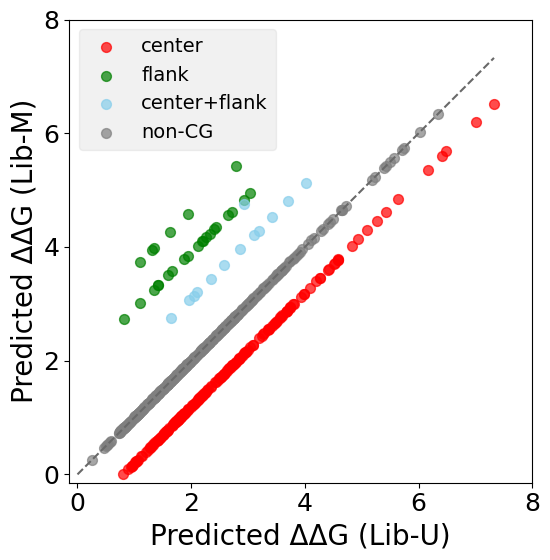

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.size'] = 20

df = pd.read_csv('ATF4.csv')

# filtered_df = df[
#     (df['ddg_IDEA_LibU'] <= 1.0) &
#     (df['ddg_IDEA_LibM'] <= 1.0)
# ]

filtered_df = df

u = filtered_df['ddg_IDEA_LibU']
m = filtered_df['ddg_IDEA_LibM']
data_min = min(u.min(), m.min())
data_max = max(u.max(), m.max())
margin = 0.02 * (data_max - data_min)
lims = [data_min - margin, 8]
# lims = [0, 8]

color_map = {
    'center': 'red',
    'flank': 'green',
    'center+flank': 'skyblue',
    'non-CG': 'gray'
}

fig, ax = plt.subplots(figsize=(6, 6))

for label, color in color_map.items():
    subset = filtered_df[filtered_df['label'] == label]
    ax.scatter(
        subset['ddg_IDEA_LibU'],
        subset['ddg_IDEA_LibM'],
        label=label,
        color=color,
        alpha=0.7,
        marker='o',
        s=50,
        clip_on=False
    )

ax.plot([data_min, data_max], [data_min, data_max], linestyle='--', color='dimgray', linewidth=1.5)

ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_aspect('equal', 'box')

# ax.xaxis.set_major_locator(MultipleLocator(1))
# ax.yaxis.set_major_locator(MultipleLocator(1))

step = 2  
locator = MultipleLocator(step)
ax.xaxis.set_major_locator(locator)
ax.yaxis.set_major_locator(locator)


# ax.xaxis.set_minor_locator(MultipleLocator(0.5))
# ax.yaxis.set_minor_locator(MultipleLocator(0.5))
# ax.tick_params(which='minor', length=4)

ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))  
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

ax.set_xlabel('Predicted ΔΔG (Lib-U)')
ax.set_ylabel('Predicted ΔΔG (Lib-M)')

leg = ax.legend(
    # loc='upper left',
    fontsize=14,
    frameon=True,
    facecolor='lightgray',
    framealpha=0.3
)

plt.tight_layout()
# plt.show()
# plt.savefig('ATF4_mIDEA.pdf', format='pdf')